<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/CSAI/TP/CSAI_TP1p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [ ]:
# Exemple d'utilisation avec une matrice de distances
distance_matrix = [
    [0, 29, 20, 21, 17, 34, 42, 27],
    [29, 0, 15, 29, 28, 40, 31, 23],
    [20, 15, 0, 15, 14, 25, 32, 30],
    [21, 29, 15, 0, 4, 10, 12, 29],
    [17, 28, 14, 4, 0, 8, 18, 35],
    [34, 40, 25, 10, 8, 0, 15, 20],
    [42, 31, 32, 12, 18, 15, 0, 28],
    [27, 23, 30, 29, 35, 20, 28, 0]
]

In [ ]:
import random

def Init_int(pop_size=20, bit_nb=8):
    pop = []
    for _ in range(pop_size):
        vect = random.sample(range(bit_nb), bit_nb)
        pop.append(vect)
    return pop

pop = Init_int()
print(pop)

[[4, 7, 2, 1, 6, 5, 0, 3], [0, 5, 6, 3, 7, 4, 1, 2], [7, 5, 1, 0, 4, 6, 3, 2], [0, 7, 6, 2, 3, 1, 5, 4], [0, 4, 7, 3, 6, 2, 1, 5], [5, 2, 4, 6, 1, 0, 7, 3], [5, 2, 4, 6, 0, 1, 7, 3], [3, 2, 1, 7, 4, 5, 0, 6], [2, 1, 3, 4, 6, 0, 7, 5], [5, 0, 7, 2, 6, 1, 4, 3], [6, 3, 2, 7, 0, 4, 5, 1], [6, 5, 4, 3, 1, 0, 2, 7], [5, 7, 6, 3, 2, 4, 1, 0], [1, 2, 0, 4, 6, 7, 3, 5], [2, 6, 3, 5, 7, 0, 1, 4], [0, 1, 5, 2, 3, 6, 4, 7], [7, 4, 6, 3, 0, 5, 1, 2], [7, 3, 1, 2, 6, 4, 5, 0], [0, 6, 7, 4, 1, 3, 2, 5], [7, 6, 1, 4, 5, 2, 0, 3]]


# Mutation

In [ ]:
def Mut_int(vect, Pm):
    if random.random() < Pm:
        pos1, pos2 = random.sample(range(len(vect)), 2)
        vect[pos1], vect[pos2] = vect[pos2], vect[pos1]
    return vect

print(Mut_int(pop[0], 1))
print(pop)

[3, 4, 6, 0, 7, 2, 1, 5]
[[3, 4, 6, 0, 7, 2, 1, 5], [1, 3, 6, 5, 7, 4, 2, 0], [1, 7, 0, 5, 6, 2, 3, 4], [5, 1, 3, 2, 4, 6, 7, 0], [6, 3, 5, 1, 0, 4, 7, 2], [7, 0, 5, 3, 2, 1, 6, 4], [7, 4, 2, 5, 0, 1, 6, 3], [7, 3, 1, 5, 4, 6, 2, 0], [7, 0, 6, 2, 1, 3, 5, 4], [4, 5, 0, 3, 1, 2, 7, 6], [7, 3, 1, 0, 5, 4, 6, 2], [4, 1, 7, 3, 5, 6, 0, 2], [3, 2, 6, 5, 1, 4, 0, 7], [5, 3, 2, 0, 1, 6, 7, 4], [0, 2, 7, 1, 4, 5, 3, 6], [3, 1, 7, 2, 5, 0, 4, 6], [6, 5, 1, 3, 7, 4, 0, 2], [2, 7, 3, 5, 6, 4, 0, 1], [3, 5, 4, 7, 6, 1, 2, 0], [3, 7, 2, 1, 5, 4, 6, 0]]


# Crossover

In [ ]:
import random

def Coss_int(v1, v2, Pc):
  oldv1,oldv2=v1[:],v2[:]
  #print(v1,v2)
  k=random.randint(1,len(v1)-1)
  #k=5
  for i in range(k):
    num=oldv1[i]
    while num in oldv2[k:]:
      new_num_ind=oldv2.index(num)
      new_num=oldv1[new_num_ind]
      num = new_num
    oldv1[i]=num

  child1=oldv1[:k]+oldv2[k:]
  oldv1,oldv2=v1[:],v2[:]
  for i in range(k):
    num=oldv2[i]
    while num in oldv1[k:]:
      new_num_ind=oldv1.index(num)
      new_num=oldv2[new_num_ind]
      num = new_num
    oldv2[i]=num
  child2=oldv2[:k]+oldv1[k:]

  return child1, child2



In [ ]:

v1=[7,5,0,3,4,2,6,1]
v2=[1,6,3,4,2,5,0,7]
# Calling the function
child1, child2 = Coss_int(v1,v2, Pc=0.09)

# Check results
print("v1:", v1)
print("v2:", v2)
print("child1:", child1)
print("child2:", child2)
print(pop)

v1: [7, 5, 0, 3, 4, 2, 6, 1]
v2: [1, 6, 3, 4, 2, 5, 0, 7]
child1: [1, 2, 6, 3, 4, 5, 0, 7]
child2: [7, 0, 3, 4, 5, 2, 6, 1]
[[4, 7, 2, 1, 6, 5, 0, 3], [0, 5, 6, 3, 7, 4, 1, 2], [7, 5, 1, 0, 4, 6, 3, 2], [0, 7, 6, 2, 3, 1, 5, 4], [0, 4, 7, 3, 6, 2, 1, 5], [5, 2, 4, 6, 1, 0, 7, 3], [5, 2, 4, 6, 0, 1, 7, 3], [3, 2, 1, 7, 4, 5, 0, 6], [2, 1, 3, 4, 6, 0, 7, 5], [5, 0, 7, 2, 6, 1, 4, 3], [6, 3, 2, 7, 0, 4, 5, 1], [6, 5, 4, 3, 1, 0, 2, 7], [5, 7, 6, 3, 2, 4, 1, 0], [1, 2, 0, 4, 6, 7, 3, 5], [2, 6, 3, 5, 7, 0, 1, 4], [0, 1, 5, 2, 3, 6, 4, 7], [7, 4, 6, 3, 0, 5, 1, 2], [7, 3, 1, 2, 6, 4, 5, 0], [5, 7, 2, 4, 1, 6, 0, 3], [7, 6, 1, 4, 5, 2, 0, 3]]


In [ ]:
def fitness(vect, distance_matrix):
    total_distance = 0
    for i in range(len(vect) - 1):
        total_distance += distance_matrix[vect[i]][vect[i+1]]
    # Ajouter la distance de retour à la ville de départ
    total_distance += distance_matrix[vect[-1]][vect[0]]
    return total_distance

print(fitness(pop[0],distance_matrix))

185


In [ ]:
def Replace_int(v, pop):

    a=pop[0]
    pos=0
    for i in range(len(pop)):
      if fitness(pop[i],distance_matrix)>fitness(a,distance_matrix):
        a=pop[i]
        pos=i

    # Remplacer l'individu à la position 'pos' par le vecteur 'v'
    if (fitness(v,distance_matrix)<fitness(a,distance_matrix)):
      pop[pos] = v
    return pop

print(Replace_int([5, 7, 2, 4, 1, 6, 0, 3],pop))



[[4, 7, 2, 1, 6, 5, 0, 3], [0, 5, 6, 3, 7, 4, 1, 2], [7, 5, 1, 0, 4, 6, 3, 2], [0, 7, 6, 2, 3, 1, 5, 4], [0, 4, 7, 3, 6, 2, 1, 5], [5, 2, 4, 6, 1, 0, 7, 3], [5, 2, 4, 6, 0, 1, 7, 3], [3, 2, 1, 7, 4, 5, 0, 6], [2, 1, 3, 4, 6, 0, 7, 5], [5, 0, 7, 2, 6, 1, 4, 3], [6, 3, 2, 7, 0, 4, 5, 1], [6, 5, 4, 3, 1, 0, 2, 7], [5, 7, 6, 3, 2, 4, 1, 0], [1, 2, 0, 4, 6, 7, 3, 5], [2, 6, 3, 5, 7, 0, 1, 4], [0, 1, 5, 2, 3, 6, 4, 7], [7, 4, 6, 3, 0, 5, 1, 2], [7, 3, 1, 2, 6, 4, 5, 0], [5, 7, 2, 4, 1, 6, 0, 3], [7, 6, 1, 4, 5, 2, 0, 3]]


In [ ]:
def Select_roulette(pop,distance_matrix):
    fitnesses = [fitness(vect,distance_matrix) for vect in pop]
    total_fitness = sum(fitnesses)
    probabilities = [f / total_fitness for f in fitnesses]

    selected = random.choices(range(len(pop)), weights=probabilities, k=1)[0]
    return selected,pop[selected]

print(Select_roulette(pop,distance_matrix))


(19, [7, 6, 1, 4, 5, 2, 0, 3])


In [ ]:
population = Init_int(20, len(distance_matrix))

In [ ]:


def genetic_algorithm_tsp(distance_matrix, iterations=200, population=population, Pc=0.09, Pm=0.02):
    # Initialiser la population

    for iteration in range(iterations):
        best_individual = min(population, key=lambda ind: fitness(ind, distance_matrix))
        best_fitness = fitness(best_individual, distance_matrix)
        print(best_fitness)
        new_population = population[:]

        ind1,parent1 = Select_roulette(population, distance_matrix)
        ind2,parent2 = Select_roulette(population, distance_matrix)
        # Croisement
        offspring1, offspring2 = Coss_int(parent1, parent2, Pc)
        # Mutation
        offspring1 = Mut_int(offspring1, Pm)
        offspring2 = Mut_int(offspring2, Pm)
        # Remplacement
        new_population = Replace_int(offspring1, new_population)
        new_population = Replace_int(offspring2, new_population)

        population = new_population


    # Trouver le meilleur individu (avec la plus petite distance)
    best_individual = min(population, key=lambda ind: fitness(ind, distance_matrix))
    best_fitness = fitness(best_individual, distance_matrix)

    return best_individual, best_fitness

best_solution, best_distance = genetic_algorithm_tsp(distance_matrix)
print("Meilleur chemin:", best_solution)
print("Distance minimale:", best_distance)


156
156
156
156
156
156
156
156
156
156
151
151
151
151
151
151
151
151
151
151
151
151
151
151
151
151
151
151
148
148
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
Meilleur chemin: [1, 7, 5, 6, 3, 4, 0, 2]
Distance minimale: 126


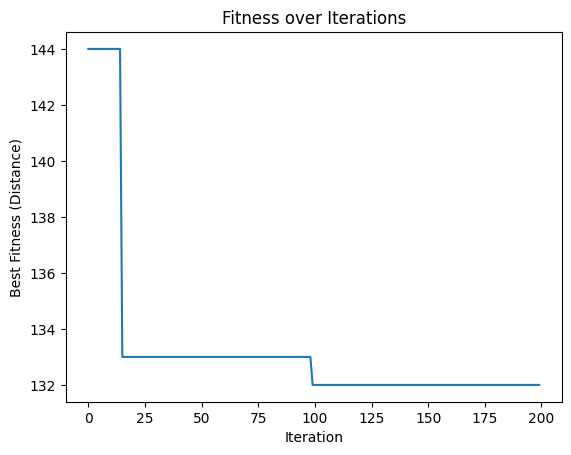

Meilleur chemin: [4, 0, 2, 1, 7, 6, 5, 3]
Distance minimale: 132


In [ ]:
import matplotlib.pyplot as plt

def genetic_algorithm_tsp(distance_matrix, iterations=200, population=population, Pc=0.09, Pm=0.02):
    # Initialize population and track fitness over time
    fitness_over_time = []

    for iteration in range(iterations):
        # Find the best individual in the current population
        best_individual = min(population, key=lambda ind: fitness(ind, distance_matrix))
        best_fitness = fitness(best_individual, distance_matrix)

        # Append the best fitness for the current iteration
        fitness_over_time.append(best_fitness)

        new_population = population[:]

        # Selection
        ind1, parent1 = Select_roulette(population, distance_matrix)
        ind2, parent2 = Select_roulette(population, distance_matrix)

        # Crossover
        offspring1, offspring2 = Coss_int(parent1, parent2, Pc)

        # Mutation
        offspring1 = Mut_int(offspring1, Pm)
        offspring2 = Mut_int(offspring2, Pm)

        # Replacement
        new_population = Replace_int(offspring1, new_population)
        new_population = Replace_int(offspring2, new_population)

        # Update population
        population = new_population

    # Find the best individual in the final population
    best_individual = min(population, key=lambda ind: fitness(ind, distance_matrix))
    best_fitness = fitness(best_individual, distance_matrix)

    # Plot fitness over iterations
    plt.plot(range(iterations), fitness_over_time)
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness (Distance)")
    plt.title("Fitness over Iterations")
    plt.show()

    return best_individual, best_fitness

# Run the genetic algorithm and plot the fitness graph
best_solution, best_distance = genetic_algorithm_tsp(distance_matrix)
print("Meilleur chemin:", best_solution)
print("Distance minimale:", best_distance)
